In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()
dataset = datasets.FashionMNIST(root = "./data", train= True, download= True, transform=transform)

loader = torch.utils.data.DataLoader(dataset=dataset,batch_size = 32, shuffle = True)


In [3]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
         
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AE().to(device)

loss_func = nn.MSELoss()

optimizer = optim.Adam(model.parameters(),lr = 0.001,weight_decay= 1e-8)


Epoch [1/50], Loss: 0.0163
Epoch [2/50], Loss: 0.0181
Epoch [3/50], Loss: 0.0148
Epoch [4/50], Loss: 0.0170
Epoch [5/50], Loss: 0.0101
Epoch [6/50], Loss: 0.0143
Epoch [7/50], Loss: 0.0139
Epoch [8/50], Loss: 0.0134
Epoch [9/50], Loss: 0.0136
Epoch [10/50], Loss: 0.0163
Epoch [11/50], Loss: 0.0117
Epoch [12/50], Loss: 0.0156
Epoch [13/50], Loss: 0.0120
Epoch [14/50], Loss: 0.0166
Epoch [15/50], Loss: 0.0142
Epoch [16/50], Loss: 0.0122
Epoch [17/50], Loss: 0.0162
Epoch [18/50], Loss: 0.0113
Epoch [19/50], Loss: 0.0131
Epoch [20/50], Loss: 0.0146
Epoch [21/50], Loss: 0.0137
Epoch [22/50], Loss: 0.0139
Epoch [23/50], Loss: 0.0151
Epoch [24/50], Loss: 0.0130
Epoch [25/50], Loss: 0.0153
Epoch [26/50], Loss: 0.0160
Epoch [27/50], Loss: 0.0163
Epoch [28/50], Loss: 0.0157
Epoch [29/50], Loss: 0.0141
Epoch [30/50], Loss: 0.0136
Epoch [31/50], Loss: 0.0149
Epoch [32/50], Loss: 0.0165
Epoch [33/50], Loss: 0.0128
Epoch [34/50], Loss: 0.0147
Epoch [35/50], Loss: 0.0123
Epoch [36/50], Loss: 0.0146
E

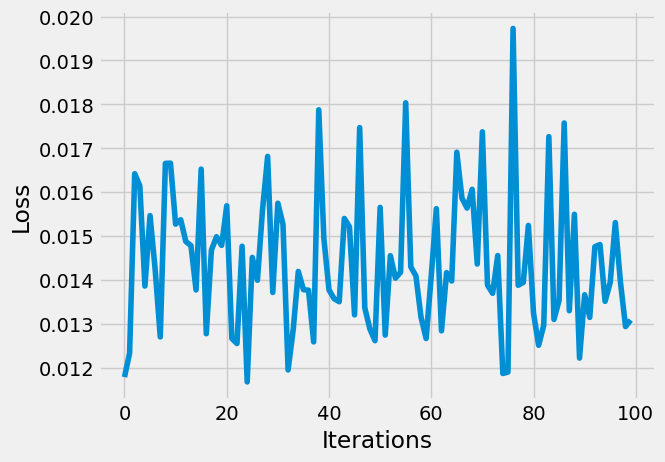

In [21]:
epochs = 50
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
       
      # Reshaping the image to (-1, 784)
      image = image.to(device).reshape(-1, 28*28)
       
      # Output of Autoencoder
      reconstructed = model(image)
       
      # Calculating the loss function
      loss = loss_func(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(loss.item())
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    outputs.append((epochs, image, reconstructed))
    
 
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])
plt.show()

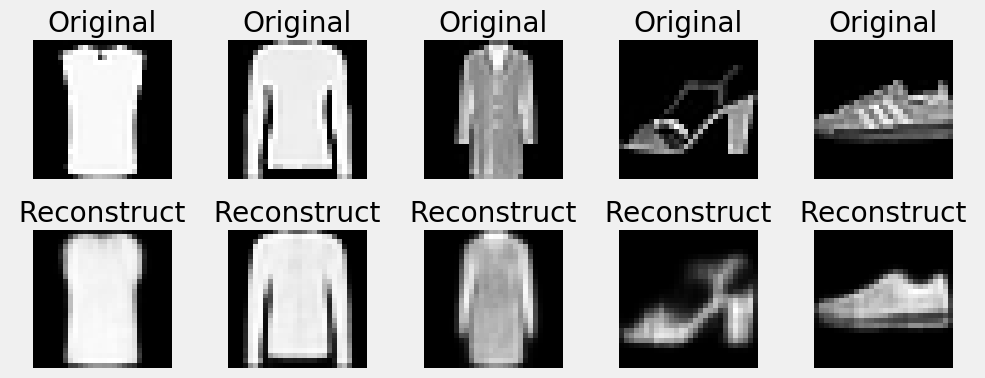

In [22]:
import matplotlib.pyplot as plt

# Visualize the original and reconstructed images
n = 5  # Number of images to display
plt.figure(figsize=(10, 4))

# Plot original images
for i in range(n):
    item = image[i].cpu().detach().numpy().reshape(28, 28)  # Move to CPU, detach from computation graph, and reshape
    plt.subplot(2, n, i + 1)  # 2 rows: 1 for originals, 1 for reconstructions
    plt.imshow(item, cmap='gray')
    plt.title("Original")
    plt.axis("off")

# Plot reconstructed images
for i in range(n):
    item = reconstructed[i].cpu().detach().numpy().reshape(28, 28)  # Move to CPU, detach, and reshape
    plt.subplot(2, n, i + 1 + n)  # Second row for reconstructions
    plt.imshow(item, cmap='gray')
    plt.title(" Reconstruct ")
    plt.axis("off")

plt.tight_layout()
# Save the plot as an image file
plt.savefig("original_vs_reconstructed_50e.png", format="png")
plt.show()